In [14]:
import numpy as np
import os, pickle
from einops import rearrange
import matplotlib.pyplot as plt

def get_train(path):
    with open(os.path.join(path, 'train.pkl'), 'rb') as f:
        return np.array(pickle.load(f))
    
d1 = get_train('runs/weather_TCN_weather_sl128_ll10_pl48_el3_dist_0')
d2 = get_train('runs/weather_TCN_weather_sl128_ll10_pl48_el3_no_dist_0')

print(d1.shape, d2.shape)
d1 = rearrange(d1, 'b l c -> l (b c)')
d2 = rearrange(d2, 'b l c -> l (b c)')
print(d1.shape, d2.shape)
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')[:-window_size]
ds1 = [movingaverage(d1[i], 200) for i in range(len(d1))]
ds2 = movingaverage(d2[0], 200)

(12, 6, 574) (10, 1, 574)


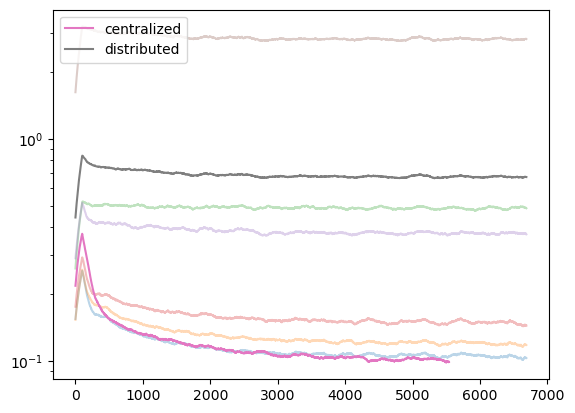

In [21]:

for i in range(len(ds1)):
    plt.plot(ds1[i], alpha=0.3)
plt.plot(ds2, label='centralized')
plt.plot(np.average(ds1, axis=0), label='distributed')
plt.legend()

plt.yscale('log')
plt.show()


In [22]:
def get_val(path):
    with open(os.path.join(path, 'vali.pkl'), 'rb') as f:
        return np.array(pickle.load(f))
    
d1 = get_val('runs/weather_TCN_weather_sl128_ll10_pl48_el3_dist_0')
d2 = get_val('runs/weather_TCN_weather_sl128_ll10_pl48_el3_no_dist_0')

print(d1.shape, d2.shape)


(12, 6) (10, 1)
